In [5]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

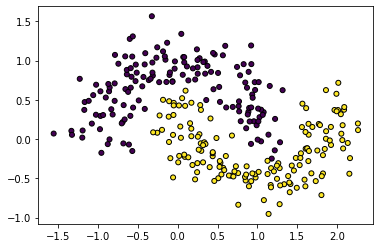

In [6]:
X1, Y1 = make_moons(n_samples=300, noise=0.2)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

In [8]:
input_size = 2
hidden_size = 8
output_size = 1

net = nn.Sequential(nn.Linear(input_size, hidden_size), # hidden
                   nn.ReLU(), # ativação não linear
                   nn.Linear(hidden_size, output_size)) # output

net

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)

In [10]:
from torchsummary import summary
summary(net, input_size=(1, input_size))

Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            24
├─ReLU: 1-2                              --
├─Linear: 1-3                            9
Total params: 33
Trainable params: 33
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            24
├─ReLU: 1-2                              --
├─Linear: 1-3                            9
Total params: 33
Trainable params: 33
Non-trainable params: 0

In [13]:
print(X1.shape)
tensor = torch.from_numpy(X1).float()
pred = net(tensor)
pred.size()

(300, 2)


torch.Size([300, 1])

In [14]:
class MinhaRede(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        super(MinhaRede, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size) 
        
    def forward(self, X):
        hidden = self.relu(self.hidden(X))
        output = self.output(hidden)
        
        return output

In [15]:
net = MinhaRede(input_size, hidden_size, output_size)
net

MinhaRede(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)